In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Loading the data
df= pd.read_excel('data/news_share_data.xlsx')
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [8]:
df.shape

(1003, 22)

In [9]:
df.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [11]:
df.describe()

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


In [12]:
df['data_channel'].value_counts()

00000            350
Tech             198
Entertainment    185
Business         164
Social Media      55
Lifestyle         51
Name: data_channel, dtype: int64

## Encoding data_channel

In [30]:
channel = {
    '00000': 0,
    'Tech': 1,
    'Entertainment': 2,
    'Business': 3,
    'Social Media': 4,
    'Lifestyle': 5
}

df['data_channel'] = df['data_channel'].replace(channel)

In [31]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,3,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,1,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,1,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,1,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,0,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


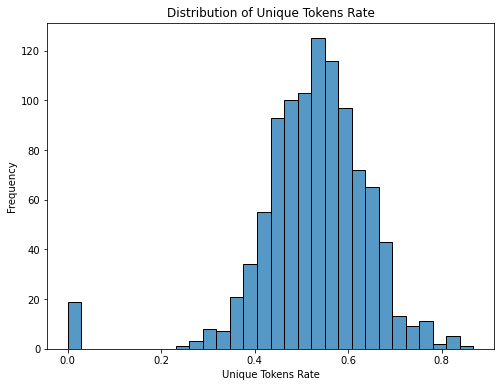

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['unique_tokens_rate'], bins=30)
plt.xlabel('Unique Tokens Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Tokens Rate')
plt.show()

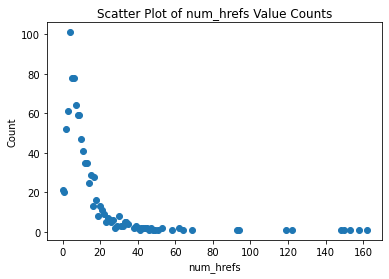

In [53]:
value_counts = df['num_hrefs'].value_counts()

plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('num_hrefs')
plt.ylabel('Count')
plt.title('Scatter Plot of num_hrefs Value Counts')

plt.show()

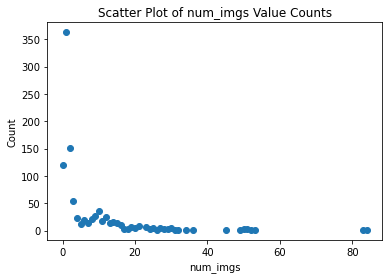

In [54]:
value_counts = df['num_imgs'].value_counts()

plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('num_imgs')
plt.ylabel('Count')
plt.title('Scatter Plot of num_imgs Value Counts')

plt.show()

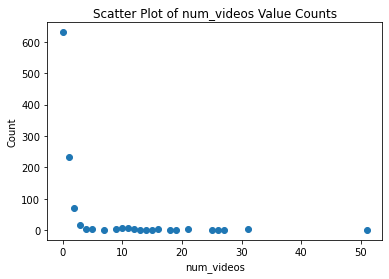

In [55]:
value_counts = df['num_videos'].value_counts()

plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('num_videos')
plt.ylabel('Count')
plt.title('Scatter Plot of num_videos Value Counts')

plt.show()

In [60]:
df['data_channel'].value_counts()

0    350
1    198
2    185
3    164
4     55
5     51
Name: data_channel, dtype: int64

Unique Number of data_channel in the Data: 6


0    350
1    198
2    185
3    164
4     55
5     51
Name: data_channel, dtype: int64

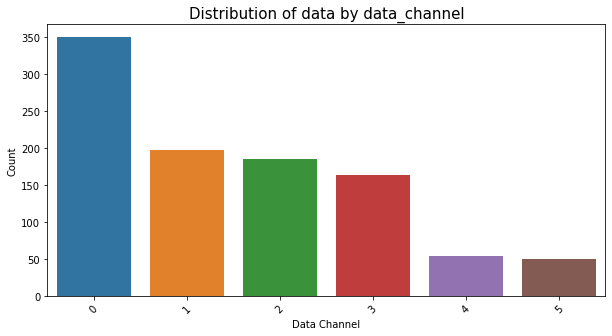

In [66]:
print(f"Unique Number of data_channel in the Data: {df['data_channel'].nunique()}")

temp = df['data_channel'].value_counts()
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp.index,y=temp)
plt.title("Distribution of data by data_channel",size=15)
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Outlier Treatment

In [68]:
# Treating outliers in the numeric columns
cols_to_treat = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key',
                  'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
                  'global_rate_negative_words', 'title_subjectivity', 'title_sentiment_polarity', 'shares']

print("\nDistribution (raw):")
display(df[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)
    

print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())  


Distribution (raw):


,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000



Distribution (after outlier treatment):


,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,0.524354,10.395813,4.580259,0.634098,4.592637,7.206381,1121.769655,5546.328503,3253.750034,7070.637844,0.443956,0.103971,0.037661,0.017285,0.292537,0.048470,2801.232303
std,0.114301,8.264578,5.885661,1.052852,0.687086,1.856713,1162.286160,2351.984209,1039.975808,11158.376049,0.103480,0.087489,0.014419,0.009043,0.325227,0.244098,2956.119061
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,0.687783,33.000000,21.000000,4.000000,5.125162,10.000000,3264.605000,11800.000000,5638.779700,45940.000000,0.598904,0.259083,0.064156,0.036680,1.000000,0.500000,12290.000000


In [76]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Minju
[nltk_data]     Mojumder\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [80]:
df['Text Cleaned'] = df['text'].apply(lambda x: x.lower().strip())

In [81]:
df.sample(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,Text Cleaned
182,7032218,Fort Hood Shooter Identified as Specialist Iva...,The gunman who opened fire at Fort Hood on Wed...,2014-04-03,0.687783,5.0,13.0,1.0,5.115152,8,0,1862.0,8515.966,5281.045,1050.0,0.598904,-0.102920,0.060606,0.036680,0.4,-0.4,1400,the gunman who opened fire at fort hood on wed...
912,7023624,"Where NHL Fans' Playoff Loyalties Lie, in 1 Fa...","Ready for two months of body-checks, fisticuff...",2014-04-16,0.505906,8.0,0.0,0.0,4.481336,10,1,0.0,4631.967,2686.797,17200.0,0.486537,0.184816,0.043222,0.017682,0.0,0.0,1500,"ready for two months of body-checks, fisticuff..."
953,7023399,Powered Up and Ready to Go: Inside BMW's First...,"With its strong curves and Lotus-style doors, ...",2014-04-17,0.503240,2.0,3.0,0.0,4.333333,4,1,1600.0,3610.125,2825.761,6700.0,0.422931,0.160374,0.034188,0.006410,0.0,0.0,1500,"with its strong curves and lotus-style doors, ..."


In [82]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

#Custom Stoplist
stoplist = ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)

# Function to preprocess the text
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
df_text = df["Text Cleaned"].astype(str).apply(text_prepare)
df_text.head()

0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
2    world series champion boston red sox visited w...
3    less week apple pledged make emoticons raciall...
4    android users may soon series new features dev...
Name: Text Cleaned, dtype: object

In [83]:
text = " ".join(sent for sent in df_text)
print("There are {} words in the text.".format(len(text)))

There are 1772416 words in the text.


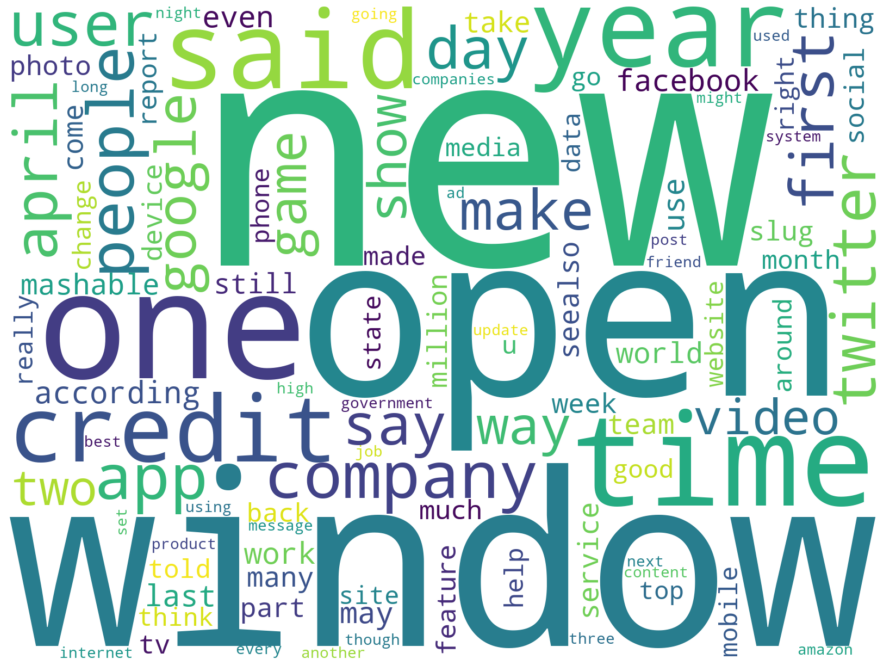

In [84]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [85]:
df["Text Cleaned"] =  df["Text Cleaned"].astype(str).apply(text_prepare)

In [86]:
from collections import Counter

def pos_counter(x,pos):
    """
    Returns the count for the given parts of speech tag
    
    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

df['Noun_Counts'] = df['Text Cleaned'].apply(lambda x: pos_counter(x,'NN'))
df['Verb_Counts'] = df['Text Cleaned'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
df['Adjective_Counts'] = df['Text Cleaned'].apply(lambda x: pos_counter(x,'JJ'))

In [87]:
print(df.shape)
df.head()

(1003, 26)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,Text Cleaned,Noun_Counts,Verb_Counts,Adjective_Counts
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5.0,3.0,1.0,4.579592,5,3,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,reported last week yahoo getting online video ...,38,8,19
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4.0,1.0,0.0,4.636704,7,1,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,april fools marks day pranking goes corporate ...,16,4,12
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8.0,1.0,0.0,4.627451,7,1,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,world series champion boston red sox visited w...,97,16,55
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4.0,1.0,0.0,5.083665,9,1,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,less week apple pledged make emoticons raciall...,52,13,26
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6.0,9.0,0.0,4.336022,7,0,3264.605,8453.451,5155.323,805.000,0.598904,0.078497,0.053763,0.034946,0.00,0.00,3000,android users may soon series new features dev...,43,10,33


In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
# cv = CountVectorizer()
cv_object = cv.fit(df['Text Cleaned'])

In [91]:
import pickle
fileName = 'model/count_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(cv_object,f)

In [92]:
X = cv_object.transform(df['Text Cleaned'])
print(X.shape)
X.toarray()

(1003, 10)


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [93]:
cv_object.get_feature_names()

['april opens',
 'fire tv',
 'last year',
 'new window',
 'new york',
 'opens new',
 'pic twitter',
 'seealso slug',
 'social media',
 'twitter com']

In [94]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names())
print(df_ngram.shape)
df_ngram.head()

(1003, 10)


,april opens,fire tv,last year,new window,new york,opens new,pic twitter,seealso slug,social media,twitter com
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,5,0,0,17,0,13,5,0,0,5
3,0,0,0,2,0,2,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0


In [95]:
df_final = pd.concat([df.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
df_final.shape

(1003, 36)

In [118]:
df_final = df_final.drop(columns=['article_id', 'title', 'published_date', 'Text Cleaned'], axis=1)

In [119]:
df_final.sample(5)

,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,Noun_Counts,Verb_Counts,Adjective_Counts,april opens,fire tv,last year,new window,new york,opens new,pic twitter,seealso slug,social media,twitter com
872,0.560935,33.0,3.0,0.0,5.125162,5,2,1651.435,5689.179,3643.990,2100.0,0.549648,0.090410,0.043614,0.031153,0.0,0.0,693,61,5,23,0,0,2,2,0,2,0,0,0,0
942,0.432955,13.0,1.0,0.0,5.058625,7,0,0.000,3901.311,1970.968,0.0,0.477689,0.108437,0.034949,0.014656,0.0,0.0,1000,64,17,32,0,0,0,4,0,4,0,1,0,0
172,0.484220,33.0,0.0,4.0,4.965992,4,2,1200.000,3724.838,2935.841,7126.8,0.562618,0.092448,0.031579,0.025911,0.6,-0.3,4000,74,7,36,0,0,0,4,0,4,0,0,0,0
836,0.687783,0.0,1.0,0.0,4.418182,6,0,2231.676,6283.500,3584.420,0.0,0.598904,0.259083,0.054545,0.000000,0.0,0.0,1100,44,7,25,0,0,0,1,5,1,0,1,0,0
129,0.485757,17.0,8.0,0.0,4.460526,7,1,2704.769,4358.143,3274.061,8450.0,0.490053,0.070078,0.048246,0.027778,0.0,0.0,1500,26,5,16,0,0,0,1,0,1,0,0,0,0


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [120]:
X = df_final.drop(columns=['shares'])
y = df['shares']

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((802, 30), (802,), (201, 30), (201,))

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [116]:
text_columns = ['title', 'Text Cleaned']

numerical_columns = [col for col in X_train.columns if col not in text_columns]

text_transformer = ('vectorizer_tfidf', TfidfVectorizer(), text_columns)
numerical_transformer = ('scaler', StandardScaler(), numerical_columns)

preprocessor = ColumnTransformer(
    transformers=[text_transformer, numerical_transformer]
)

reg = LinearRegression()

clf = Pipeline([
     ('preprocessor', preprocessor),
     ('reg', reg)         
])


clf.fit(X_train, y_train)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 802

In [123]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = reg.predict(X_test)

In [138]:
y_pred

array([1737.00071375, 3998.12724115, 2382.31655279, 2392.18533693,
       2576.4634762 , 1615.88693225, 3255.34116197, 3055.7028098 ,
       2735.23783902, 3709.18138583, 2918.62993092, 1979.06342201,
       2370.19497847, 3649.79060673, 2257.22329637, 1904.35599128,
       2753.43911096, 2048.20567293, 2289.00760063, 3098.35965814,
       5603.98626075, 3794.17255321, 3200.33974536, 2890.9918282 ,
       2732.40544297, 3592.72079969, 3346.35950921, 3488.70594733,
       1535.57703346, 2011.16272366, 1975.45776712, 2472.10488343,
       3767.89521641, 3399.9614413 , 2674.09022527, 2633.68427344,
       3225.38879623, 2246.72533148, 3076.43733534, 2603.07709557,
       1856.8890179 , 2889.86659867, 2863.16353502, 3394.14162   ,
       2401.18274796, 2735.30123332, 2073.84391205, 2326.17533957,
       2683.41192787, 2907.2605387 , 3090.92867581, 2976.88345364,
       3182.5867728 , 4066.87237312, 2205.2357817 , 4360.3120829 ,
       1948.93993085, 2732.97666156, 3055.58544418, 3132.15309